In [1]:
import cv2
print(cv2.__version__)


4.7.0


In [1]:
!pip install opencv-contrib-python==4.7.0.68

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


## **To Generate ArUco Markers**

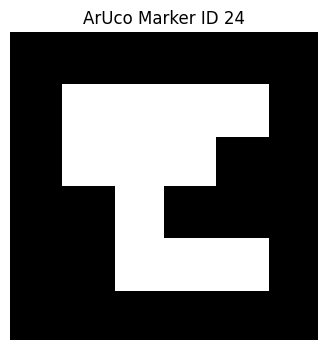

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)

# Generate a marker
marker_id = 24  # ID for the marker
marker_size = 100  # Size of the marker image
marker_img = cv2.aruco.generateImageMarker(aruco_dict, marker_id, marker_size)

# Display the marker
plt.figure(figsize=(4, 4))
plt.imshow(marker_img, cmap='gray')
plt.axis('off')
plt.title(f'ArUco Marker ID {marker_id}')
plt.show()

cv2.imwrite(f'aruco_marker_id_{marker_id}.png', marker_img)
# cv2.imshow('ArUco Marker', marker_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## **To Detect the ArUco Markers and store it in CSV File**

In [ ]:
import cv2
import numpy as np
import os
import csv
import time

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)

# Initialize the detector parameters using default values
parameters = cv2.aruco.DetectorParameters()

# Function to detect and display ArUco markers in a frame
def detect_aruco_markers(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if ids is not None:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        return frame, ids.flatten().tolist()  # Return the detected IDs as a list
    return frame, []  # Return an empty list if no markers are detected

# Open a video file or a webcam stream
video_path = '/content/ar3.mp4'  # Change this to your actual video file path

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video source")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}")
print(f"Total number of frames: {total_frames}")

frame_number = 0  # Frame counter
start_time = time.time()  # Initialize the start time

# Specify the path where the frames will be saved
save_dir = 'save2'
os.makedirs(save_dir, exist_ok=True)

# Path to save the CSV file
csv_path = '/content/aruco_detection_log2.csv'

# Open the CSV file for writing and write the header
with open(csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['timestamp', 'frame_number', 'detected_ids']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect ArUco markers in the frame
        frame, detected_ids = detect_aruco_markers(frame)

        if detected_ids:
            # Save the frame as a PNG image if markers are detected
            save_path = os.path.join(save_dir, f'frame_{frame_number:04d}.png')
            cv2.imwrite(save_path, frame)

            # Log the detected IDs and timestamp (relative to the start time)
            timestamp = time.time() - start_time
            writer.writerow({'timestamp': timestamp, 'frame_number': frame_number, 'detected_ids': detected_ids})
            print(f"Frame {frame_number}: Detected IDs: {detected_ids} at timestamp {timestamp:.6f}")

        frame_number += 1

        # Display the frame
        # cv2.imshow('ArUco Marker Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

end_time = time.time()
total_execution_time = end_time - start_time
print(f"Total execution time: {total_execution_time:.6f} seconds")

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print(f"Processed frames are saved in {save_dir}")
print(f"Detection log is saved in {csv_path}")


Video FPS: 59.94910941475827
Total number of frames: 589
Frame 179: Detected IDs: [85] at timestamp 1.276190
Frame 258: Detected IDs: [85] at timestamp 1.865610
Frame 330: Detected IDs: [17] at timestamp 2.406743
Frame 353: Detected IDs: [17] at timestamp 2.568285
Frame 359: Detected IDs: [17] at timestamp 2.628284
Frame 364: Detected IDs: [17] at timestamp 2.671161
Frame 401: Detected IDs: [17] at timestamp 2.919294
Frame 402: Detected IDs: [17] at timestamp 2.939884
Frame 403: Detected IDs: [17] at timestamp 2.961074
Frame 404: Detected IDs: [17] at timestamp 2.981334
Frame 407: Detected IDs: [17] at timestamp 3.013311
Frame 409: Detected IDs: [17] at timestamp 3.039832
Frame 411: Detected IDs: [17] at timestamp 3.066697
Frame 413: Detected IDs: [17] at timestamp 3.093394
Frame 416: Detected IDs: [17] at timestamp 3.127084
Frame 420: Detected IDs: [17] at timestamp 3.167266
Frame 429: Detected IDs: [17] at timestamp 3.234940
Frame 511: Detected IDs: [18] at timestamp 3.790377
Total e

## **Previous Code with some alterations like if the aruco is already detected then neglect it**

In [ ]:
import cv2
import numpy as np
import os
import csv
import time

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)

# Initialize the detector parameters using default values
parameters = cv2.aruco.DetectorParameters()

# Function to detect and display ArUco markers in a frame
def detect_aruco_markers(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if ids is not None:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        return frame, ids.flatten().tolist()  # Return the detected IDs as a list
    return frame, []  # Return an empty list if no markers are detected

# Open a video file or a webcam stream
video_path = '/content/ar3.mp4'  # Change this to your actual video file path

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video source")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}")
print(f"Total number of frames: {total_frames}")

frame_number = 0  # Frame counter
start_time = time.time()  # Initialize the start time

# Specify the path where the frames will be saved
save_dir = 'save2'
os.makedirs(save_dir, exist_ok=True)

# Path to save the CSV file
csv_path = '/content/aruco_detection_log2.csv'

# Load existing detected IDs from CSV file
existing_ids = set()
if os.path.exists(csv_path):
    with open(csv_path, mode='r', newline='') as csv_file:
        reader = csv.DictReader(csv_file)
        for row in reader:
            detected_ids = eval(row['detected_ids'])  # Convert string representation of list back to list
            existing_ids.update(detected_ids)

# Open the CSV file for writing and write the header if it's new
csv_mode = 'a' if os.path.exists(csv_path) else 'w'
with open(csv_path, mode=csv_mode, newline='') as csv_file:
    fieldnames = ['timestamp', 'frame_number', 'detected_ids']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    if csv_mode == 'w':
        writer.writeheader()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect ArUco markers in the frame
        frame, detected_ids = detect_aruco_markers(frame)

        if detected_ids:
            # Check if detected IDs are already logged
            new_ids = [id for id in detected_ids if id not in existing_ids]
            if new_ids:
                # Update the existing IDs set
                existing_ids.update(new_ids)

                # Save the frame as a PNG image if new markers are detected
                save_path = os.path.join(save_dir, f'frame_{frame_number:04d}.png')
                cv2.imwrite(save_path, frame)

                # Log the detected IDs and timestamp (relative to the start time)
                timestamp = time.time() - start_time
                writer.writerow({'timestamp': timestamp, 'frame_number': frame_number, 'detected_ids': new_ids})
                print(f"Frame {frame_number}: Detected IDs: {new_ids} at timestamp {timestamp:.6f}")

        frame_number += 1

        # Display the frame
        # cv2.imshow('ArUco Marker Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

end_time = time.time()
total_execution_time = end_time - start_time
print(f"Total execution time: {total_execution_time:.6f} seconds")

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print(f"Processed frames are saved in {save_dir}")
print(f"Detection log is saved in {csv_path}")


Video FPS: 59.94910941475827
Total number of frames: 589
Total execution time: 3.916220 seconds
Processed frames are saved in save2
Detection log is saved in /content/aruco_detection_log2.csv


## **With addition of Entry and Exit Timestamp**

In [ ]:
import cv2
import numpy as np
import os
import csv
import time

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_100)

# Initialize the detector parameters using default values
parameters = cv2.aruco.DetectorParameters()

# Function to detect and display ArUco markers in a frame
def detect_aruco_markers(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if ids is not None:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        return frame, ids.flatten().tolist()  # Return the detected IDs as a list
    return frame, []  # Return an empty list if no markers are detected

# Open a video file or a webcam stream
video_path = '/content/ar3.mp4'  # Change this to your actual video file path

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video source")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}")
print(f"Total number of frames: {total_frames}")

frame_number = 0  # Frame counter
start_time = time.time()  # Initialize the start time

# Specify the path where the frames will be saved
save_dir = 'save2'
os.makedirs(save_dir, exist_ok=True)

# Path to save the CSV file
csv_path = '/content/aruco_detection_log2.csv'

# Dictionary to store entry and exit timestamps for each ID
id_timestamps = {}

# Open the CSV file for writing and write the header
with open(csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['id', 'entry_timestamp', 'exit_timestamp']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect ArUco markers in the frame
        frame, detected_ids = detect_aruco_markers(frame)

        current_time = time.time() - start_time  # Current timestamp

        # Update entry timestamps for newly detected IDs
        for detected_id in detected_ids:
            if detected_id not in id_timestamps:
                id_timestamps[detected_id] = {'entry': current_time, 'exit': current_time}
            else:
                id_timestamps[detected_id]['exit'] = current_time

        # Save the frame as a PNG image if markers are detected
        if detected_ids:
            save_path = os.path.join(save_dir, f'frame_{frame_number:04d}.png')
            cv2.imwrite(save_path, frame)

        frame_number += 1

        # Display the frame
        # cv2.imshow('ArUco Marker Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Log the entry and exit timestamps for each ID
    for detected_id, timestamps in id_timestamps.items():
        writer.writerow({'id': detected_id, 'entry_timestamp': timestamps['entry'], 'exit_timestamp': timestamps['exit']})

end_time = time.time()
total_execution_time = end_time - start_time
print(f"Total execution time: {total_execution_time:.6f} seconds")

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print(f"Processed frames are saved in {save_dir}")
print(f"Detection log is saved in {csv_path}")


Video FPS: 59.94910941475827
Total number of frames: 589
Total execution time: 9.012798 seconds
Processed frames are saved in save2
Detection log is saved in /content/aruco_detection_log2.csv


## **With addition of Entry frame and Exit Frame No.**

In [ ]:
import cv2
import numpy as np
import os
import csv
import time

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_100)

# Initialize the detector parameters using default values
parameters = cv2.aruco.DetectorParameters()

# Function to detect and display ArUco markers in a frame
def detect_aruco_markers(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if ids is not None:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        return frame, ids.flatten().tolist()  # Return the detected IDs as a list
    return frame, []  # Return an empty list if no markers are detected

# Open a video file or a webcam stream
video_path = '/content/ar3.mp4'  # Change this to your actual video file path

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video source")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video FPS: {fps}")
print(f"Total number of frames: {total_frames}")

frame_number = 0  # Frame counter
start_time = time.time()  # Initialize the start time

# Specify the path where the frames will be saved
save_dir = 'save2'
os.makedirs(save_dir, exist_ok=True)

# Path to save the CSV file
csv_path = '/content/aruco_detection_log2.csv'

# Dictionary to store entry and exit timestamps and frame numbers for each ID
id_timestamps = {}

# Open the CSV file for writing and write the header
with open(csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['id', 'entry_timestamp', 'exit_timestamp', 'entry_frame', 'exit_frame']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect ArUco markers in the frame
        frame, detected_ids = detect_aruco_markers(frame)

        current_time = time.time() - start_time  # Current timestamp

        # Update entry and exit timestamps and frame numbers for detected IDs
        for detected_id in detected_ids:
            if detected_id not in id_timestamps:
                id_timestamps[detected_id] = {
                    'entry': current_time,
                    'exit': current_time,
                    'entry_frame': frame_number,
                    'exit_frame': frame_number
                }
            else:
                id_timestamps[detected_id]['exit'] = current_time
                id_timestamps[detected_id]['exit_frame'] = frame_number

        # Save the frame as a PNG image if markers are detected
        if detected_ids:
            save_path = os.path.join(save_dir, f'frame_{frame_number:04d}.png')
            cv2.imwrite(save_path, frame)

        frame_number += 1

        # Display the frame
        # cv2.imshow('ArUco Marker Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Log the entry and exit timestamps and frame numbers for each ID
    for detected_id, timestamps in id_timestamps.items():
        writer.writerow({
            'id': detected_id,
            'entry_timestamp': timestamps['entry'],
            'exit_timestamp': timestamps['exit'],
            'entry_frame': timestamps['entry_frame'],
            'exit_frame': timestamps['exit_frame']
        })

end_time = time.time()
total_execution_time = end_time - start_time
print(f"Total execution time: {total_execution_time:.6f} seconds")

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print(f"Processed frames are saved in {save_dir}")
print(f"Detection log is saved in {csv_path}")


Video FPS: 59.94910941475827
Total number of frames: 589
Total execution time: 8.783374 seconds
Processed frames are saved in save2
Detection log is saved in /content/aruco_detection_log2.csv


In [ ]:
!rm -rf /content/save2

## **Save the clip of each id.**

In [ ]:
import cv2
import numpy as np
import os
import csv
import time

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_100)

# Initialize the detector parameters using default values
parameters = cv2.aruco.DetectorParameters()

# Function to detect and display ArUco markers in a frame
def detect_aruco_markers(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if ids is not None:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        return frame, ids.flatten().tolist()  # Return the detected IDs as a list
    return frame, []  # Return an empty list if no markers are detected

# Open a video file or a webcam stream
video_path = '/content/ar3.mp4'  # Change this to your actual video file path

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video source")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Video FPS: {fps}")
print(f"Total number of frames: {total_frames}")

frame_number = 0  # Frame counter
start_time = time.time()  # Initialize the start time

# Specify the path where the frames will be saved
save_dir = 'save2'
os.makedirs(save_dir, exist_ok=True)

# Path to save the CSV file
csv_path = '/content/aruco_detection_log2.csv'

# Dictionary to store entry and exit timestamps and frame numbers for each ID
id_timestamps = {}
id_videos = {}

# Open the CSV file for writing and write the header
with open(csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['id', 'entry_timestamp', 'exit_timestamp', 'entry_frame', 'exit_frame']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect ArUco markers in the frame
        frame, detected_ids = detect_aruco_markers(frame)

        current_time = time.time() - start_time  # Current timestamp

        # Update entry and exit timestamps and frame numbers for detected IDs
        for detected_id in detected_ids:
            if detected_id not in id_timestamps:
                id_timestamps[detected_id] = {
                    'entry': current_time,
                    'exit': current_time,
                    'entry_frame': frame_number,
                    'exit_frame': frame_number
                }
                # Create a VideoWriter object to save the video clip
                video_save_path = os.path.join(save_dir, f'id_{detected_id}.mp4')
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                id_videos[detected_id] = cv2.VideoWriter(video_save_path, fourcc, fps, (frame_width, frame_height))
            else:
                id_timestamps[detected_id]['exit'] = current_time
                id_timestamps[detected_id]['exit_frame'] = frame_number

        # Save the frame to the video clip for each detected ID
        for detected_id in detected_ids:
            id_videos[detected_id].write(frame)

        frame_number += 1

        # Display the frame (optional)
        # cv2.imshow('ArUco Marker Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the VideoWriter objects and log the entry and exit timestamps and frame numbers for each ID
    for detected_id, timestamps in id_timestamps.items():
        id_videos[detected_id].release()
        writer.writerow({
            'id': detected_id,
            'entry_timestamp': timestamps['entry'],
            'exit_timestamp': timestamps['exit'],
            'entry_frame': timestamps['entry_frame'],
            'exit_frame': timestamps['exit_frame']
        })

end_time = time.time()
total_execution_time = end_time - start_time
print(f"Total execution time: {total_execution_time:.6f} seconds")

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print(f"Processed frames are saved in {save_dir}")
print(f"Detection log is saved in {csv_path}")


Video FPS: 59.94910941475827
Total number of frames: 589
Total execution time: 5.201891 seconds
Processed frames are saved in save2
Detection log is saved in /content/aruco_detection_log2.csv


## **Exact Timestamp and Save the clip**

In [ ]:
import cv2
import numpy as np
import os
import csv

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_100)

# Initialize the detector parameters using default values
parameters = cv2.aruco.DetectorParameters()

# Function to detect and display ArUco markers in a frame
def detect_aruco_markers(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if ids is not None:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        return frame, ids.flatten().tolist()  # Return the detected IDs as a list
    return frame, []  # Return an empty list if no markers are detected

# Open a video file or a webcam stream
video_path = '/content/ar3.mp4'  # Change this to your actual video file path

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video source")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Video FPS: {fps}")
print(f"Total number of frames: {total_frames}")

frame_number = 0  # Frame counter

# Specify the path where the frames will be saved
save_dir = 'save2'
os.makedirs(save_dir, exist_ok=True)

# Path to save the CSV file
csv_path = '/content/aruco_detection_log2.csv'

# Dictionary to store entry and exit timestamps and frame numbers for each ID
id_timestamps = {}
id_videos = {}

# Open the CSV file for writing and write the header
with open(csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['id', 'entry_timestamp', 'exit_timestamp', 'entry_frame', 'exit_frame']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect ArUco markers in the frame
        frame, detected_ids = detect_aruco_markers(frame)

        # Get the current timestamp in milliseconds
        current_time_msec = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0  # Convert to seconds

        # Update entry and exit timestamps and frame numbers for detected IDs
        for detected_id in detected_ids:
            if detected_id not in id_timestamps:
                id_timestamps[detected_id] = {
                    'entry': current_time_msec,
                    'exit': current_time_msec,
                    'entry_frame': frame_number,
                    'exit_frame': frame_number
                }
                # Create a VideoWriter object to save the video clip
                video_save_path = os.path.join(save_dir, f'id_{detected_id}.mp4')
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                id_videos[detected_id] = cv2.VideoWriter(video_save_path, fourcc, fps, (frame_width, frame_height))
            else:
                id_timestamps[detected_id]['exit'] = current_time_msec
                id_timestamps[detected_id]['exit_frame'] = frame_number

        # Save the frame to the video clip for each detected ID
        for detected_id in detected_ids:
            id_videos[detected_id].write(frame)

        frame_number += 1

        # Display the frame (optional)
        # cv2.imshow('ArUco Marker Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the VideoWriter objects and log the entry and exit timestamps and frame numbers for each ID
    for detected_id, timestamps in id_timestamps.items():
        id_videos[detected_id].release()
        writer.writerow({
            'id': detected_id,
            'entry_timestamp': timestamps['entry'],
            'exit_timestamp': timestamps['exit'],
            'entry_frame': timestamps['entry_frame'],
            'exit_frame': timestamps['exit_frame']
        })

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print(f"Processed frames are saved in {save_dir}")
print(f"Detection log is saved in {csv_path}")


Video FPS: 59.94910941475827
Total number of frames: 589
Processed frames are saved in save2
Detection log is saved in /content/aruco_detection_log2.csv


## **Exact timestamdp and save both clip and frames**

In [5]:
import cv2
import numpy as np
import os
import csv

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)

# Initialize the detector parameters using default values
parameters = cv2.aruco.DetectorParameters()

# Function to detect and display ArUco markers in a frame
def detect_aruco_markers(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    if ids is not None:
        frame = cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        return frame, ids.flatten().tolist()  # Return the detected IDs as a list
    return frame, []  # Return an empty list if no markers are detected

# Open a video file or a webcam stream
video_path = '/content/Aruco002.mp4'  # Change this to your actual video file path

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video source")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Video FPS: {fps}")
print(f"Total number of frames: {total_frames}")

frame_number = 0  # Frame counter

# Specify the path where the frames and clips will be saved
frames_dir = 'frames'
clips_dir = 'clips'
os.makedirs(frames_dir, exist_ok=True)
os.makedirs(clips_dir, exist_ok=True)

# Path to save the CSV file
csv_path = '/content/aruco_detection_log2.csv'

# Dictionary to store entry and exit timestamps and frame numbers for each ID
id_timestamps = {}
id_videos = {}

# Open the CSV file for writing and write the header
with open(csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['id', 'entry_timestamp', 'exit_timestamp', 'entry_frame', 'exit_frame']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect ArUco markers in the frame
        frame, detected_ids = detect_aruco_markers(frame)

        # Get the current timestamp in milliseconds
        current_time_msec = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0  # Convert to seconds

        # Update entry and exit timestamps and frame numbers for detected IDs
        for detected_id in detected_ids:
            if detected_id not in id_timestamps:
                id_timestamps[detected_id] = {
                    'entry': current_time_msec,
                    'exit': current_time_msec,
                    'entry_frame': frame_number,
                    'exit_frame': frame_number
                }
                # Create a VideoWriter object to save the video clip
                video_save_path = os.path.join(clips_dir, f'id_{detected_id}.mp4')
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                id_videos[detected_id] = cv2.VideoWriter(video_save_path, fourcc, fps, (frame_width, frame_height))
            else:
                id_timestamps[detected_id]['exit'] = current_time_msec
                id_timestamps[detected_id]['exit_frame'] = frame_number

        # Save the frame to the video clip and as a PNG image for each detected ID
        for detected_id in detected_ids:
            id_videos[detected_id].write(frame)
            frame_save_path = os.path.join(frames_dir, f'id_{detected_id}_frame_{frame_number:04d}.png')
            cv2.imwrite(frame_save_path, frame)

        frame_number += 1

        # Display the frame (optional)
        # cv2.imshow('ArUco Marker Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the VideoWriter objects and log the entry and exit timestamps and frame numbers for each ID
    for detected_id, timestamps in id_timestamps.items():
        id_videos[detected_id].release()
        writer.writerow({
            'id': detected_id,
            'entry_timestamp': timestamps['entry'],
            'exit_timestamp': timestamps['exit'],
            'entry_frame': timestamps['entry_frame'],
            'exit_frame': timestamps['exit_frame']
        })

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print(f"Processed frames are saved in {frames_dir}")
print(f"Video clips are saved in {clips_dir}")
print(f"Detection log is saved in {csv_path}")


Video FPS: 23.832537336062465
Total number of frames: 503
Processed frames are saved in frames
Video clips are saved in clips
Detection log is saved in /content/aruco_detection_log2.csv


In [2]:
!rm -rf /content/clips

'rm' is not recognized as an internal or external command,
operable program or batch file.


## **Check Confidentiality and save**

In [1]:
import cv2
import numpy as np
import os
import csv

# Load the predefined dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)

# Initialize the detector parameters using default values
parameters = cv2.aruco.DetectorParameters()
parameters.adaptiveThreshWinSizeMin = 5
parameters.adaptiveThreshWinSizeMax = 23
parameters.adaptiveThreshWinSizeStep = 10
parameters.minMarkerPerimeterRate = 0.03
parameters.maxMarkerPerimeterRate = 4.0
parameters.minMarkerDistanceRate = 0.05

# Function to calculate confidence score based on the marker's perimeter
def calculate_confidence(corners):
    # Flatten the corners to calculate distances
    corners = corners.reshape(4, 2)
    dists = []
    for i in range(4):
        d1 = np.linalg.norm(corners[i] - corners[(i + 1) % 4])
        d2 = np.linalg.norm(corners[i] - corners[(i - 1) % 4])
        dists.append((d1 + d2) / 2)
    mean_dist = np.mean(dists)
    std_dev = np.std(dists)
    confidence = max(0, 100 - std_dev / mean_dist * 100)  # Normalize to percentage
    return confidence

# Function to detect and display ArUco markers in a frame
def detect_aruco_markers(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

    if ids is not None:
        valid_ids = []
        valid_corners = []
        for i in range(len(ids)):
            confidence = calculate_confidence(corners[i])
            if confidence >= 98:  # Confidence threshold
                valid_ids.append(ids[i])
                valid_corners.append(corners[i])

        if valid_ids:
            frame = cv2.aruco.drawDetectedMarkers(frame, valid_corners, np.array(valid_ids))
            return frame, np.array(valid_ids).flatten().tolist()  # Return the detected IDs as a list
    return frame, []  # Return an empty list if no markers are detected

# Open a video file or a webcam stream
video_path = 'Aruco006.mp4'  # Change this to your actual video file path

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video source")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Video FPS: {fps}")
print(f"Total number of frames: {total_frames}")

frame_number = 0  # Frame counter

# Specify the path where the frames and clips will be saved
frames_dir = 'frames'
clips_dir = 'clips'
os.makedirs(frames_dir, exist_ok=True)
os.makedirs(clips_dir, exist_ok=True)

# Path to save the CSV file
csv_path = 'aruco_detection_log2.csv'

# Dictionary to store entry and exit timestamps and frame numbers for each ID
id_timestamps = {}
id_videos = {}

# Open the CSV file for writing and write the header
with open(csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['id', 'entry_timestamp', 'exit_timestamp', 'entry_frame', 'exit_frame']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Detect ArUco markers in the frame
        frame, detected_ids = detect_aruco_markers(frame)

        # Get the current timestamp in milliseconds
        current_time_msec = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0  # Convert to seconds

        # Update entry and exit timestamps and frame numbers for detected IDs
        for detected_id in detected_ids:
            if detected_id not in id_timestamps:
                id_timestamps[detected_id] = {
                    'entry': current_time_msec,
                    'exit': current_time_msec,
                    'entry_frame': frame_number,
                    'exit_frame': frame_number
                }
                # Create a VideoWriter object to save the video clip
                video_save_path = os.path.join(clips_dir, f'id_{detected_id}.mp4')
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                id_videos[detected_id] = cv2.VideoWriter(video_save_path, fourcc, fps, (frame_width, frame_height))
            else:
                id_timestamps[detected_id]['exit'] = current_time_msec
                id_timestamps[detected_id]['exit_frame'] = frame_number

        # Save the frame to the video clip and as a PNG image for each detected ID
        for detected_id in detected_ids:
            id_videos[detected_id].write(frame)
            frame_save_path = os.path.join(frames_dir, f'id_{detected_id}_frame_{frame_number:04d}.png')
            cv2.imwrite(frame_save_path, frame)

        frame_number += 1

        # Display the frame (optional)
        # cv2.imshow('ArUco Marker Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the VideoWriter objects and log the entry and exit timestamps and frame numbers for each ID
    for detected_id, timestamps in id_timestamps.items():
        id_videos[detected_id].release()
        writer.writerow({
            'id': detected_id,
            'entry_timestamp': timestamps['entry'],
            'exit_timestamp': timestamps['exit'],
            'entry_frame': timestamps['entry_frame'],
            'exit_frame': timestamps['exit_frame']
        })

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print(f"Processed frames are saved in {frames_dir}")
print(f"Video clips are saved in {clips_dir}")
print(f"Detection log is saved in {csv_path}")


Video FPS: 29.695771518201425
Total number of frames: 727
Processed frames are saved in frames
Video clips are saved in clips
Detection log is saved in aruco_detection_log2.csv
